In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#%cd

In [3]:
# !pip install xlrd

In [7]:
energy_production_df = pd.read_excel(r'C:\WORK_JOB\programms\burn-up-to-massive\data\ЭНЕРГОВЫРАБОТКА_ИР-8.xls')
columns = energy_production_df.columns
data_df = energy_production_df.copy(deep=True)
# Удаляем лишнии столбцы
data_df = data_df[columns[:5]]
data_df = data_df.rename(columns={'Unnamed: 0':'Loading'})
# Дополняем данные пропущенными датами, когда реактор не работал
all_dates = pd.Series(pd.date_range(data_df['Дата'].min(), data_df['Дата'].max()), name='Дата').reset_index(drop=True)
data_df = data_df.merge(all_dates, on='Дата', how='right')
# Заполняем навзвание загрузки
data_df.Loading = data_df.Loading.fillna(method='ffill')
# Выбираем в значенеи энерговыработки наименьшее из двух значений по двум контурам
data_df['energy_production'] = np.where(data_df['1к, МВт ч'].fillna(200) > data_df['2к, МВт ч'].fillna(200), data_df['2к, МВт ч'], data_df['1к, МВт ч'])
data_df['Работа, ч'] = data_df['Работа, ч'].fillna(0)
data_df['energy_production'] = data_df['energy_production'].fillna(0)
data_df = data_df.drop(columns=['1к, МВт ч', '2к, МВт ч'])
data_df.to_csv('data_energy_prod.csv')


[Text(16526.0, 0, '2015-04'),
 Text(16556.0, 0, '2015-05'),
 Text(16587.0, 0, '2015-06'),
 Text(16617.0, 0, '2015-07'),
 Text(16648.0, 0, '2015-08'),
 Text(16679.0, 0, '2015-09'),
 Text(16709.0, 0, '2015-10'),
 Text(16740.0, 0, '2015-11'),
 Text(16770.0, 0, '2015-12'),
 Text(16801.0, 0, '2016-01'),
 Text(16832.0, 0, '2016-02'),
 Text(16861.0, 0, '2016-03'),
 Text(16892.0, 0, '2016-04'),
 Text(16922.0, 0, '2016-05'),
 Text(16953.0, 0, '2016-06'),
 Text(16983.0, 0, '2016-07'),
 Text(17014.0, 0, '2016-08'),
 Text(17045.0, 0, '2016-09'),
 Text(17075.0, 0, '2016-10'),
 Text(17106.0, 0, '2016-11'),
 Text(17136.0, 0, '2016-12'),
 Text(17167.0, 0, '2017-01'),
 Text(17198.0, 0, '2017-02'),
 Text(17226.0, 0, '2017-03'),
 Text(17257.0, 0, '2017-04'),
 Text(17287.0, 0, '2017-05'),
 Text(17318.0, 0, '2017-06'),
 Text(17348.0, 0, '2017-07'),
 Text(17379.0, 0, '2017-08'),
 Text(17410.0, 0, '2017-09'),
 Text(17440.0, 0, '2017-10'),
 Text(17471.0, 0, '2017-11'),
 Text(17501.0, 0, '2017-12'),
 Text(1753

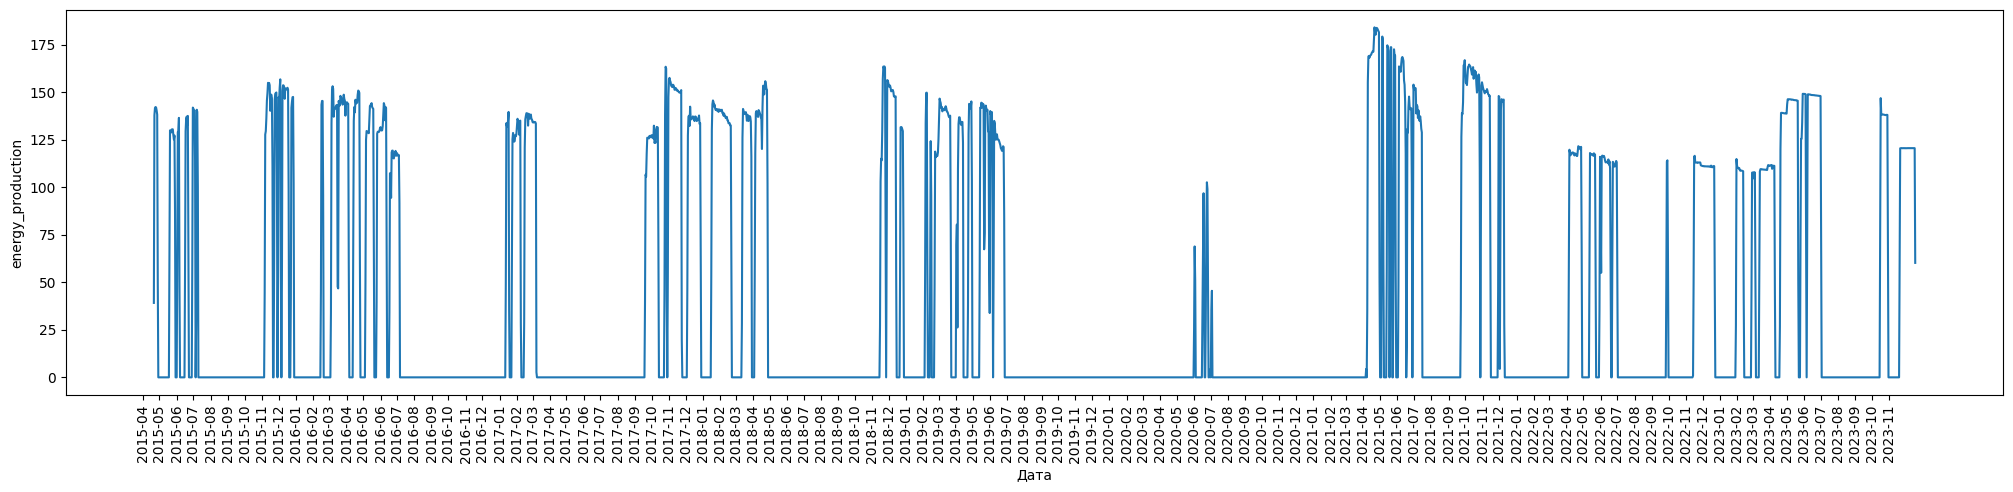

In [84]:
plt.rcParams["figure.figsize"] = (25,5)
fig, ax = plt.subplots()
sns.lineplot(data = data_df, x = 'Дата', y = 'energy_production', ax=ax)
date_index = np.arange(data_df['Дата'].min(), data_df['Дата'].max(), dtype='datetime64[M]')
ax.set_xticks(date_index)
ax.set_xticklabels(date_index, rotation=90)

In [85]:
data_df['Power'] = data_df['energy_production'] / data_df['Работа, ч']
data_df['Power'] = data_df['Power'].fillna(0)

[Text(16526.0, 0, '2015-04'),
 Text(16556.0, 0, '2015-05'),
 Text(16587.0, 0, '2015-06'),
 Text(16617.0, 0, '2015-07'),
 Text(16648.0, 0, '2015-08'),
 Text(16679.0, 0, '2015-09'),
 Text(16709.0, 0, '2015-10'),
 Text(16740.0, 0, '2015-11'),
 Text(16770.0, 0, '2015-12'),
 Text(16801.0, 0, '2016-01'),
 Text(16832.0, 0, '2016-02'),
 Text(16861.0, 0, '2016-03'),
 Text(16892.0, 0, '2016-04'),
 Text(16922.0, 0, '2016-05'),
 Text(16953.0, 0, '2016-06'),
 Text(16983.0, 0, '2016-07'),
 Text(17014.0, 0, '2016-08'),
 Text(17045.0, 0, '2016-09'),
 Text(17075.0, 0, '2016-10'),
 Text(17106.0, 0, '2016-11'),
 Text(17136.0, 0, '2016-12'),
 Text(17167.0, 0, '2017-01'),
 Text(17198.0, 0, '2017-02'),
 Text(17226.0, 0, '2017-03'),
 Text(17257.0, 0, '2017-04'),
 Text(17287.0, 0, '2017-05'),
 Text(17318.0, 0, '2017-06'),
 Text(17348.0, 0, '2017-07'),
 Text(17379.0, 0, '2017-08'),
 Text(17410.0, 0, '2017-09'),
 Text(17440.0, 0, '2017-10'),
 Text(17471.0, 0, '2017-11'),
 Text(17501.0, 0, '2017-12'),
 Text(1753

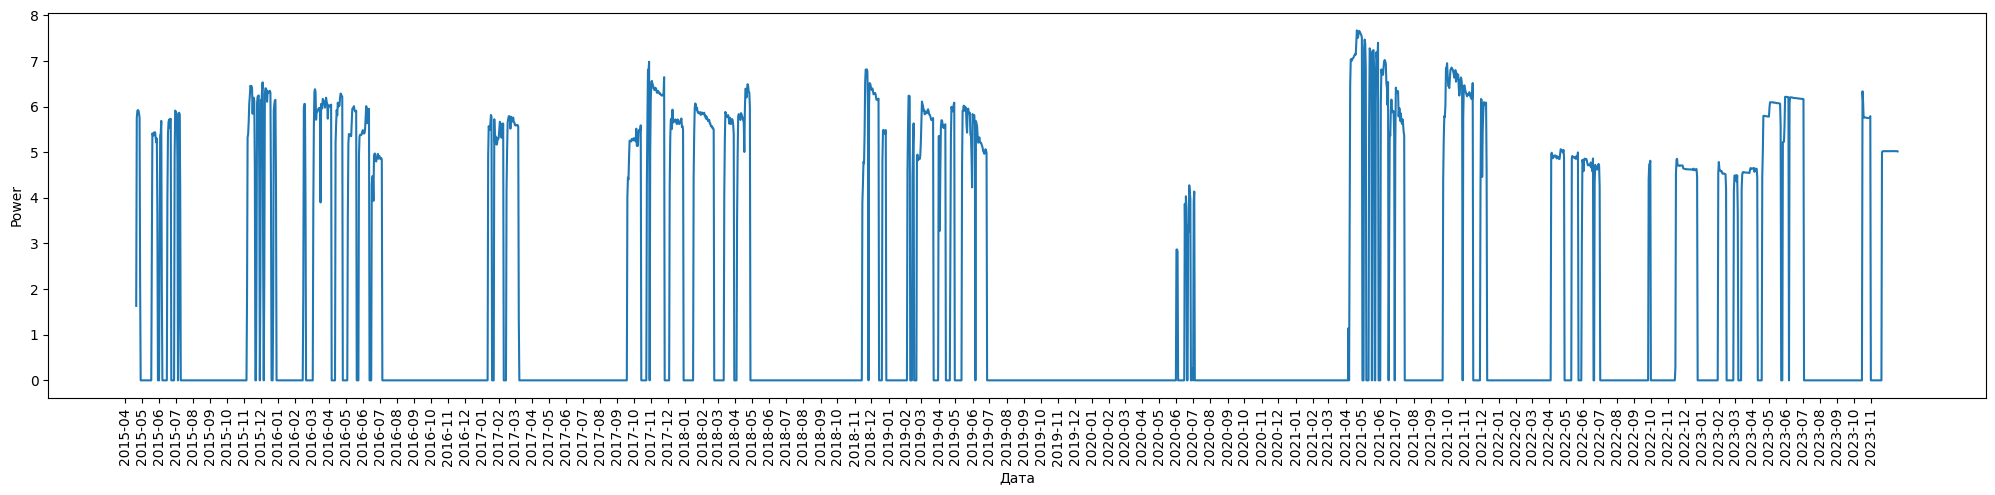

In [89]:
fig, ax = plt.subplots()
sns.lineplot(data = data_df, x = 'Дата', y = 'Power', ax=ax)
ax.set_xticks(date_index)
ax.set_xticklabels(date_index, rotation=90)

In [93]:
data_df

,Loading,Дата,"1к, МВт ч","2к, МВт ч","Работа, ч",energy_production,Power
0,2015-01А,2015-04-21,NaN,39.164,24.0,39.164000,1.631833
1,2015-01А,2015-04-22,NaN,137.898,24.0,137.898000,5.745750
2,2015-01А,2015-04-23,NaN,141.746,24.0,141.746000,5.906083
3,2015-01А,2015-04-24,NaN,142.223,24.0,142.223000,5.925958
4,2015-01А,2015-04-25,NaN,141.975,24.0,141.975000,5.915625
...,...,...,...,...,...,...,...
3159,2023-11,2023-12-14,120.542933,NaN,24.0,120.542933,5.022622
3160,2023-11,2023-12-15,120.552142,NaN,24.0,120.552142,5.023006
3161,2023-11,2023-12-16,120.575866,NaN,24.0,120.575866,5.023994
3162,2023-11,2023-12-17,120.576637,NaN,24.0,120.576637,5.024027


In [94]:
fig = px.line(data_df, x='Дата', y='Power', color='Loading', markers=True)
fig.show()

In [1]:
from pathlib import Path
vars_path = Path(r"d:\KRS_from_staying")
for path in [folder for folder in vars_path.iterdir() if folder.is_dir()]:
    for file in [file_ for file_ in path.iterdir()]:
        if file.name != 'bur00000' and str(file.suffix).lower() != '.pdc':
            # print(file.name)
            with open(file, 'r') as f, open(str(file) +'_NEW', 'w') as fw:
                    try:
                        for line in f:
                            if line.startswith('BMAX'):
                                new_line = 'BMAX  0\n'
                                fw.write(new_line)
                            elif line.startswith('MAXS'):
                                new_line_2 = 'MAXS  200\n'
                                fw.write(new_line_2)
                            elif line.startswith('DTZM'):
                                new_line_2 = 'DTZM  200\n'
                                fw.write(new_line_2)
                            else:
                                fw.write(line)
                    except:
                        print(file)
                    
                    

d:\KRS_from_staying\01_08_23\2023-05
d:\KRS_from_staying\02_07_23\2023-05
d:\KRS_from_staying\06_11_23\2023-05
d:\KRS_from_staying\13_02_23\2023-01
d:\KRS_from_staying\15_05_23\2023-04
d:\KRS_from_staying\16_02_23\2023-01
d:\KRS_from_staying\20_02_23\2023-01
d:\KRS_from_staying\23_05_23\2023-04
d:\KRS_from_staying\27_10_23\2023-05
d:\KRS_from_staying\28_02_23\2023-01
d:\KRS_from_staying\29_05_23\2023-04
d:\KRS_from_staying\30_09_23\2023-05
d:\KRS_from_staying\30_10_23\2023-05
d:\KRS_from_staying\31_08_23\2023-05


In [17]:
vars_path = Path(r"d:\KRS_from_staying")
for path in [folder for folder in vars_path.iterdir() if folder.is_dir()]:
    for file in [file_ for file_ in path.iterdir()]:
        if str(file.suffix).lower() == '.pdc':
            new_path = file.parent /(str(file.stem) + '_NEW.PDC')
            file.rename(new_path)

In [4]:
some_path = Path(r'd:\KRS_from_staying\01_03_21\2020-06.PDC')

In [12]:
new_path = some_path.parent /(str(some_path.stem) + '_NEW.PDC')
some_path.rename(new_path)

WindowsPath('d:/KRS_from_staying/01_03_21/2020-06_NEW.PDC')

In [24]:
vars_path = Path(r"d:\KRS_from_staying")
with open(vars_path / 'RUN.BAT', 'w') as fw:
    for path in [folder for folder in vars_path.iterdir() if folder.is_dir()]:
        for file in [file_ for file_ in path.iterdir()]:
            if str(file.suffix).lower() == '.pdc':
                fw.write(f'cd ..\\{file.parent.name}\ncall mcu5mpibynet.bat f {file.stem} a\n')